# Use of the pyGUTSred python library

THe code can be run anywhere, here it is running on a jupyter notebook. However, the best results in terms of usability can be achieved when running it on a ipython terminal with iteractive options:

> ipython --pylab -i scriptname.py

## General details

In [1]:
import pyGUTSred as pg
import numpy as np

import matplotlib.pyplot as plt

Initialization of the system. The pyGUTSred object inherits from the parameter space explorer class and  expands its functionalities. The pyGUTSred class includes methods to initialise, fit, plot, and calculate EFSA criteria.

Below the list of all the classes and their methods.
```python
class concclass:
    def __init__(self,concdata,name,concunits)
    def plot_exposure(self, savefig=False, figname='', extension='.png'):

class dataclass:
    def __init__(self,survdata):

class SettingParspace:
    def __init__(self, rough, profile=0):
        
class GUTSmodels:
    def __init__(self, survstruct, concstruct, variant,
                 parnames,
                 parvals,islog, isfree, 
                 parbound_lower, parbound_upper,
                 nbinsperday=96):
    def calc_ext_time(self, datastruct):
    def calc_damage(self, kd, timeext, conctime, concdata, concslopes, constc):
    def calc_survival(self, timeext, concdata, damage, pars, consc):
    def log_likelihood(self, theta, allpars, posfree):

class PyParspace:
    def __init__(self, SettingParspace, ModelSetUp):
    def replot_results(self, savefig=False, figbasename="", extension=".png"):
    def reprint_results(self):
    def run_parspace(self):
    def save_sample(self,filename):
    @classmethod
    def load_class(cls, filename):

class pyGUTSred(parspace.PyParspace):
    def __init__(self,
                 datafile,
                 variant,
                 hbfree = True,
                 preset=True,
                 parvalues=None,lbound=None,ubound=None,islog=None,isfree=None,
                 profile=True,
                 rough=False):
    def _preset_pars(self):
    def fit_hb(self):
    def run_and_time_parspace(self,batchmode=True,savefig=False,figbasename="fit",extension=".png"):
    def plot_data_model(self,fit,modellabel='model', add_obspred=True, savefig=False, figname=''):
    def EFSA_quality_criteria(self):
    def lcx_calculation(self, timepoints=[2,4,10,21],levels=[0.1,0.2,0.5],
                        plot=False, propagationset=None, 
                        savefig=False, figname='', extension='.png'):
```

External functions that do not belong to a specific class are the following:

```python
def validate(validationfile, fitmodel, propagationset, hbfix = True, plot = True, savefig=False, figname='', extension='.png'):

def readprofile(file) # this returns an object of concclass class
    
def lpx_calculation(profile, fitmodel, propagationset = None, lpxvals = [0.1,0.5], srange = [0.05, 0.999], len_srange = 50, plot = True, batch=False, figname="", extension='.png'):
```

## Example of usage

In [2]:
SDfit = pg.pyGUTSred(["datasets/ringtest_B_constant.txt"], "SD", hbfree=True) # the initialisation also plots the data

number of datasets
1
survival data:
   0   1   2   3   4   5   6   7   8
0  0  20  20  20  20  21  20  20  20
1  1  19  20  19  19  21  17  11  11
2  2  19  20  19  19  20   6   4   1
3  3  19  20  19  18  16   2   0   0
4  4  19  19  17  16  16   1   0   0
exposure data:
   0  1     2       3     4       5       6      7       8
0  0  0  8.05  11.906  13.8  17.872  24.186  28.93  35.924
1  4  0  8.05  11.906  13.8  17.872  24.186  28.93  35.924
Parameter settings:
parnames:  ['kd', 'bs', 'zs', 'hb1']
parameters lower bounds:  [-2.78475987e+00 -3.13476679e+00  2.20204076e-03  1.00000000e-06]
parameters upper bounds:  [ 2.15774424  3.96894706 35.56476     0.07      ]
parameters are log-transformed:  [1 1 0 0]
parameters are free:  [1 1 1 1]
precompile the functions
setup the parameter space explorer


The dataset can be viewed before starting the analysis with the dedicated method

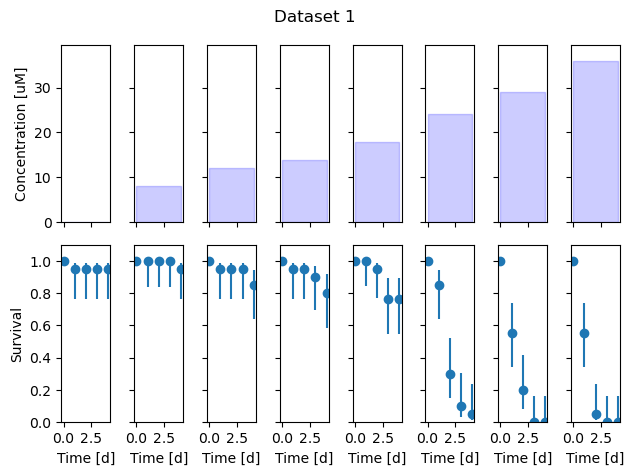

In [3]:
SDfit.plot_data_model(fit=0)

Now that everything has been set up, it is possible to run the parameter space explorer

['Starting round ', 1, ' Initial run with ', 16128, ' parameter sets']
So far best likelihood value is: 129.9575
['Starting round ', 2, ', refining a selection of ', 200, ' parameter sets, with ', 60.0, ' tries each']
  Status:  58  sets within total CI and  4  within inner. Best fit: 123.8304
Removed  0  duplicate values
['Starting round ', 3, ', refining a selection of ', 782, ' parameter sets, with ', 40.0, ' tries each']
  Status:  1477  sets within total CI and  179  within inner. Best fit: 123.8304
Removed  0  duplicate values
['Starting round ', 4, ', refining a selection of ', 5044, ' parameter sets, with ', 13.0, ' tries each']
  Status:  11050  sets within total CI and  1523  within inner. Best fit: 123.8304
Next round will be focussed on the inner rim (outer rim has enough values)
Removed  0  duplicate values
['Starting round ', 5, ', refining a selection of ', 401, ' parameter sets, with ', 40.0, ' tries each']
  Status:  10991  sets within total CI and  3151  within inner.

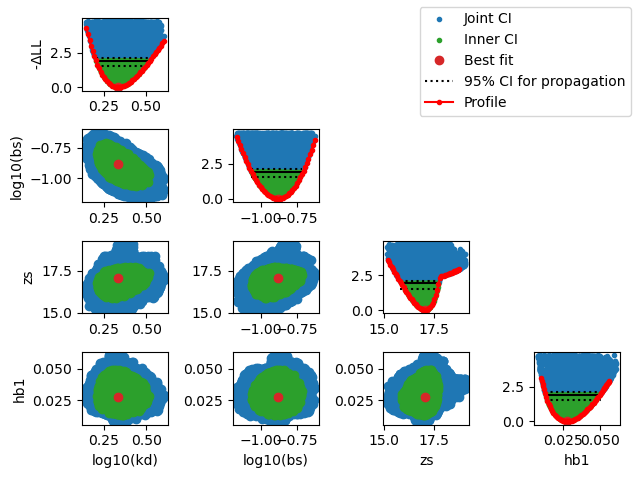

Results obtained with the parameters space explorer with profiling option.
Best fit likelihood: 123.83
Best fit AIC: 255.66
Parameter values:
Parameter       Best       Lower 95%       Upper 95%       l.bound hit u.bound hit broken CI  
kd              2.1599     (1.6299         3.3307        ) 0           0           0          
bs              0.1318     (0.0878         0.1929        ) 0           0           0          
zs              17.0569    (15.9164        17.7278       ) 0           0           0          
hb1             0.0275     (0.0138         0.0494        ) 0           0           0          
Elapsed time for the parameter space exploration: 35.1670


In [4]:
SDfit.run_and_time_parspace(batchmode=False,savefig=False)

The class allows to reprint the results and replot (and potentially save the figure) using the attributes that are directly in the parspace class.


In [5]:
efsacrit = SDfit.EFSA_quality_criteria()

-- Dataset 1 ---------------------------------
R2: 0.9839
NRMSE(%): 7.3423
----------------------------------------------
R2 with t=0 point: 0.9861
NRMSE(%) with t=0 point: 5.9612
----------------------------------------------
Survival probability prediction error (SPPE)
Treatment    value     
0            5.43 %
1            5.43 %
2            -4.57 %
3            -9.57 %
4            4.79 %
5            -0.488 %
6            -0.674 %
7            -0.0284 %
----------------------------------------------


Now it is possible to plot the figure of data and model fit

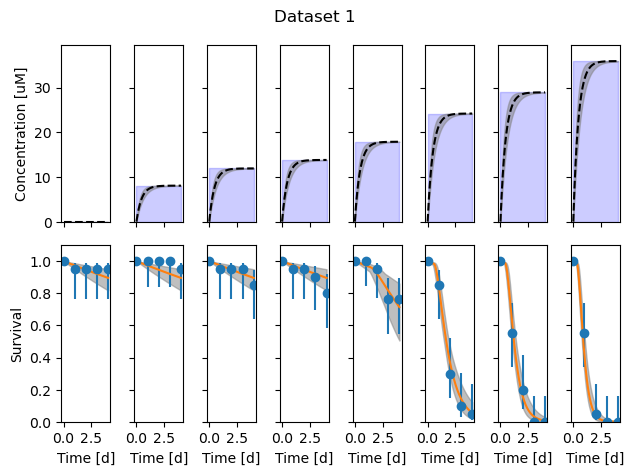

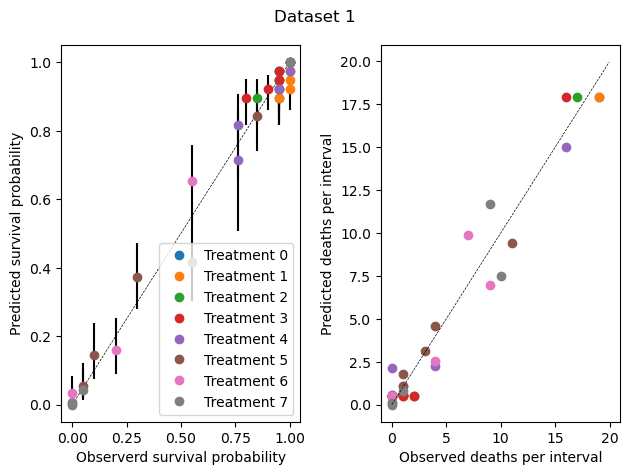

In [6]:
SDfit.plot_data_model(fit=2)

Now the validation using a new dataset

survival data:
     0   1   2   3   4
0    0  60  70  70  70
1    1  59  50  57  70
2    2  58  49  53  69
3    3  58  49  52  69
4    4  57  45  50  68
5    5  57  45  46  66
6    6  56  45  45  65
7    7  56  42  44  64
8    8  56  38  40  60
9    9  55  37  38  55
10  10  54  36  37  54
exposure data:
       0  1      2      3     4
0      0  0  30.56  28.98  4.93
1   0.96  0  27.93  27.66  4.69
2      1  0      0      0  4.69
3   1.96  0   0.26   0.27  4.58
4   2.96  0   0.21   0.26  4.58
5      3  0  27.69   0.26  4.58
6   3.96  0  26.49   0.26  4.54
7      4  0      0   0.26  4.54
8   4.96  0   0.18   0.25  4.58
9   4.97  0   0.18   0.25  4.71
10  5.96  0   0.18   0.03  4.71
11  6.96  0   0.14      0   4.6
12     7  0   0.14  26.98   4.6
13  7.96  0   0.18  26.28  4.59
14     8  0   0.18      0  4.59
15     9  0      0   0.12  4.46
16  9.96  0      0   0.12  4.51
hb fitted to control data: 0.0105
Validation of model with SD variant
-- Dataset 1 ---------------------------------
R

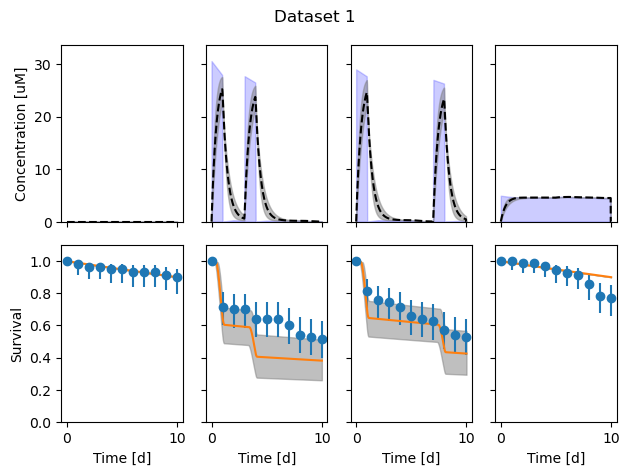

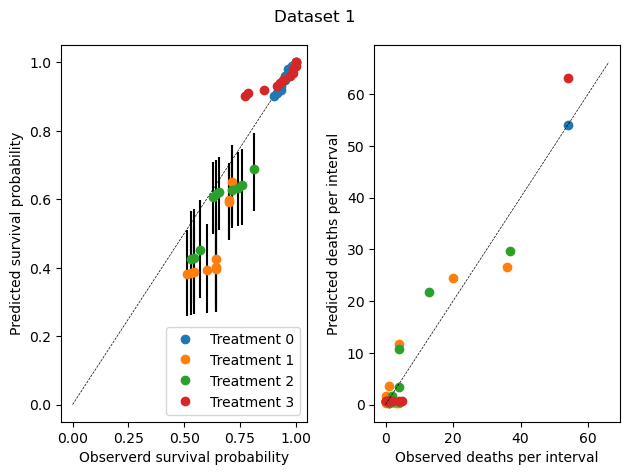

In [7]:
efsavalidation = pg.validate("./datasets/ringtest_B_pulsed.txt", SDfit.model, SDfit.propagationset, hbfix = True, plot = True)

In [8]:
import pprint
pprint.pp(efsavalidation)

{'R2': 0.5901138037168799,
 'NRMSE': 13.715600367917142,
 'R2_0': 0.6472343961577429,
 'NRMSE_0': 12.749001904866743,
 'SPPE': array([ -0.02983311,  13.39127759,  10.41295622, -12.88697597])}


Calculation of LCx values

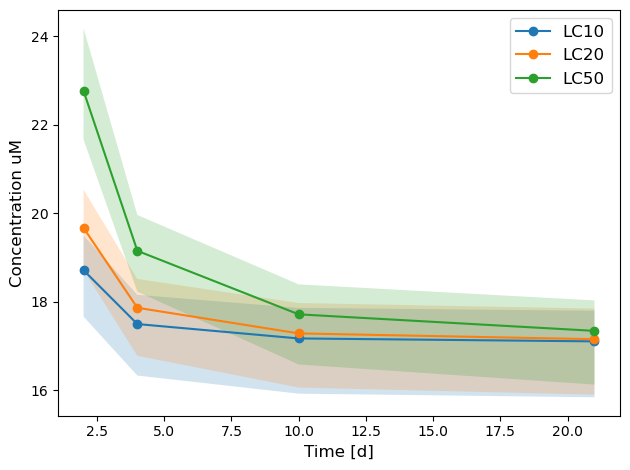

----------------------------------------------------------------
LCx values:
Time [d]  LC10                              LC20                              LC50                              
2         18.7    (17.7    - 19.5   )       19.7    (18.7    - 20.5   )       22.8    (21.7    - 24.2   )       
4         17.5    (16.3    - 18.2   )       17.9    (16.8    - 18.5   )       19.1    (18.2    - 20     )       
10        17.2    (15.9    - 17.9   )       17.3    (16.1    - 18     )       17.7    (16.6    - 18.4   )       
21        17.1    (15.8    - 17.8   )       17.2    (15.9    - 17.8   )       17.3    (16.1    - 18     )       


In [9]:
lcxvals = SDfit.lcx_calculation(timepoints=[2,4,10,21],levels=[0.1,0.2,0.5], plot=True, propagationset=SDfit.propagationset)

Calculation of LPx values

Calculation of LPx values.
Fixing background mortality to 0.
Precomputing damage vector for all the propagation sets.
Depending on how finely sampled the profile is, this could take a while.
----------------------------------------------------------------
LPx values:
LP10 :  17.1    (16      - 17.7   )       
LP50 :  19.2    (18.1    - 20.1   )       


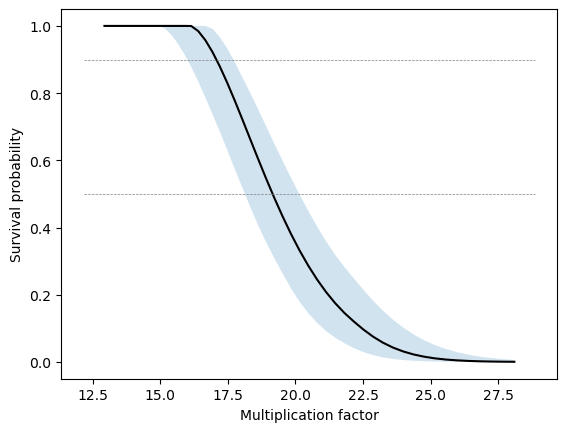

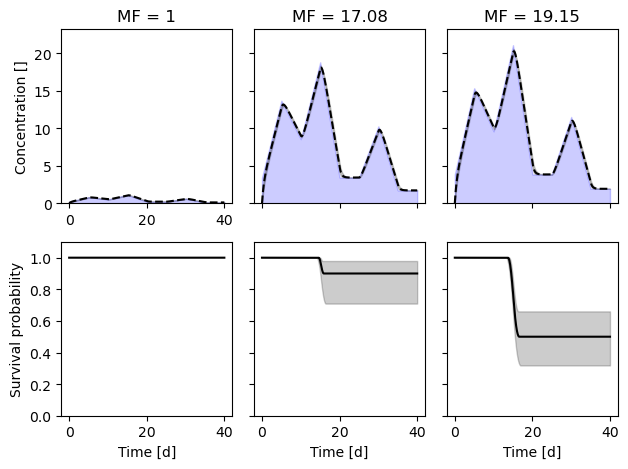

In [10]:
# initialise the profile file
profile = pg.readprofile('profiles/test1.txt')

# now run the LPx calculations
# NOTE: If the profile is particularly long and we require confidence intervals,
# the calculation can become very computationally expensive
lpxvals = pg.lpx_calculation(profile, SDfit.model, 
                       propagationset = SDfit.propagationset, 
                       lpxvals = [0.1,0.5], plot=True)